## <span style="color:darkblue; font-weight:bold"> A. Setups </span>

In [2]:
import os
print(os.getcwd())

/workspaces/car-price-prediction


In [3]:
print("***Import modules, functions and set up some visual properties for visualization")
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_tree
from xgboost import plot_importance

#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

#from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV


%run Preprocessing/Helper_Functions.ipynb  #Import some helper functions


plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = "sans-serif"
%matplotlib inline

***Import modules, functions and set up some visual properties for visualization


In [5]:
print("***Import cleaned data:\n")
data = pd.read_csv("Preprocessing/cleaned_data.csv")
print(data.info())
data

***Import cleaned data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6000 non-null   int64  
 1   selling_price  6000 non-null   int64  
 2   km_driven      6000 non-null   int64  
 3   fuel           6000 non-null   object 
 4   seller_type    6000 non-null   object 
 5   transmission   6000 non-null   object 
 6   owner          6000 non-null   object 
 7   mileage        5828 non-null   float64
 8   engine         5841 non-null   float64
 9   max_power      5840 non-null   float64
 10  torque         5840 non-null   float64
 11  seats          5841 non-null   float64
 12  brand          6000 non-null   object 
dtypes: float64(5), int64(3), object(5)
memory usage: 609.5+ KB
None


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
0,2018,850000,9500,Diesel,Individual,Manual,First Owner,25.903614,1497.0,108.50,260.00,5.0,Tata
1,2018,750000,30000,Diesel,Individual,Manual,First Owner,25.530120,1396.0,88.76,219.66,5.0,Hyundai
2,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,15.120482,2982.0,168.50,360.00,7.0,Toyota
3,2015,795000,35000,Petrol,Individual,Manual,First Owner,22.986486,1591.0,121.30,154.90,5.0,Hyundai
4,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,21.686747,1969.0,190.00,400.00,5.0,Volvo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2010,235000,50000,Petrol,Individual,Manual,First Owner,25.675676,998.0,66.10,90.00,5.0,Maruti
5996,2018,390000,40000,CNG,Individual,Manual,First Owner,26.600000,998.0,58.16,77.00,5.0,Maruti
5997,2018,450000,75000,Petrol,Individual,Manual,First Owner,27.432432,1199.0,84.00,114.00,5.0,Tata
5998,2011,250000,100000,Diesel,Individual,Manual,Second Owner,19.228916,2523.0,63.00,180.00,9.0,Mahindra


In [6]:
print("***Split data into train and test set:")
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['selling_price']), data.selling_price, test_size=0.2, random_state=222)
X_train, X_test, y_train, y_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True), y_train.reset_index(drop=True), y_test.reset_index(drop=True)

***Split data into train and test set:


## <span style="color:darkblue; font-weight:bold"> B. EDA </span>

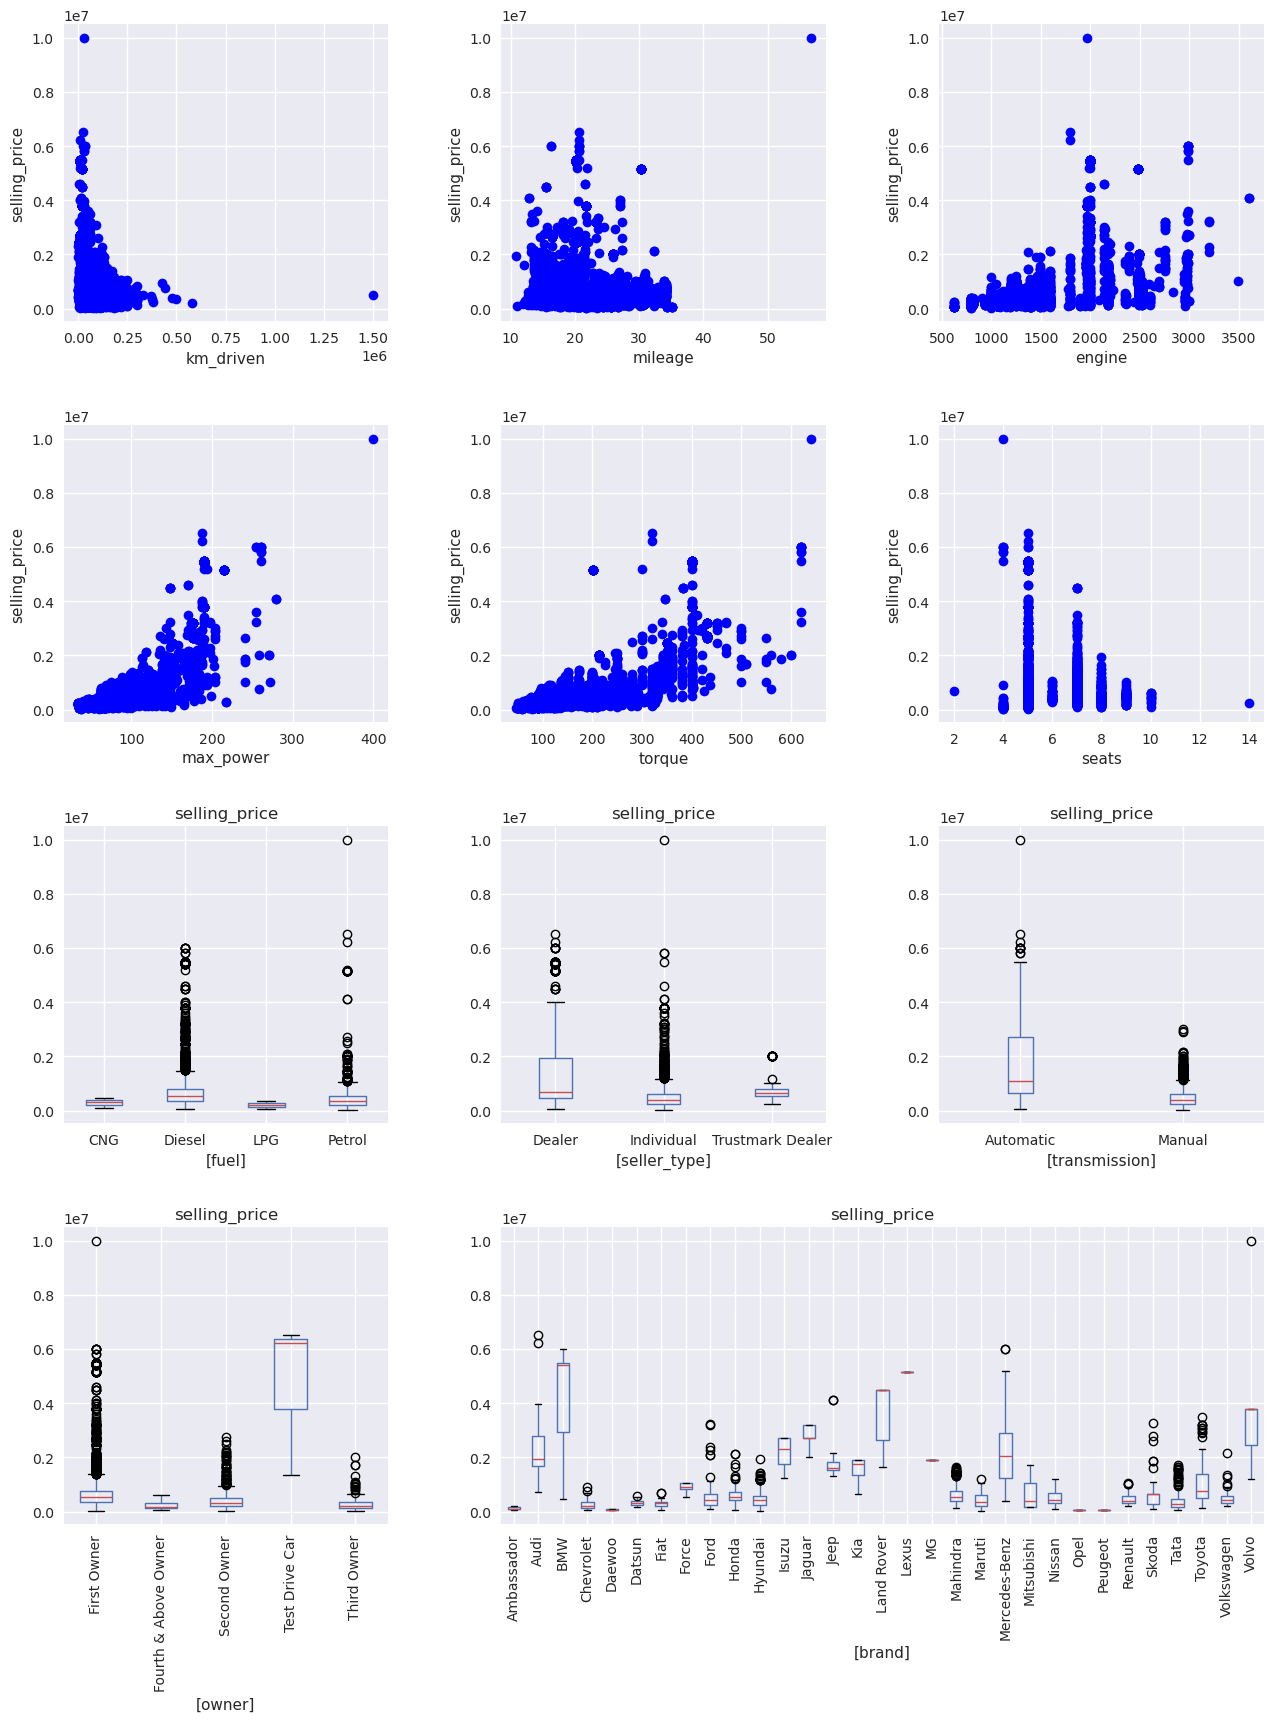

In [7]:
fig = plt.figure(figsize=(15, 20))
gs = mpl.gridspec.GridSpec(4, 3, wspace=0.35, hspace=0.35)

ax = fig.add_subplot(gs[0, 0])
ax.plot(X_train.km_driven, y_train, "bo")
ax.set_xlabel("km_driven"); ax.set_ylabel("selling_price")

ax = fig.add_subplot(gs[0, 1])
ax.plot(X_train.mileage, y_train, "bo")
ax.set_xlabel("mileage"); ax.set_ylabel("selling_price")

ax = fig.add_subplot(gs[0, 2])
ax.plot(X_train.engine, y_train, "bo")
ax.set_xlabel("engine"); ax.set_ylabel("selling_price")

ax = fig.add_subplot(gs[1, 0])
ax.plot(X_train.max_power, y_train, "bo")
ax.set_xlabel("max_power"); ax.set_ylabel("selling_price")

ax = fig.add_subplot(gs[1, 1])
ax.plot(X_train.torque, y_train, "bo")
ax.set_xlabel("torque"); ax.set_ylabel("selling_price")

ax = fig.add_subplot(gs[1, 2])
ax.plot(X_train.seats, y_train, "bo")
ax.set_xlabel("seats"); ax.set_ylabel("selling_price")

ax = fig.add_subplot(gs[2, 0])
df = pd.concat([y_train, X_train.fuel], axis=1)
df.boxplot(by="fuel", ax=ax)

ax = fig.add_subplot(gs[2, 1])
df = pd.concat([y_train, X_train.seller_type], axis=1)
df.boxplot(by="seller_type", ax=ax)

ax = fig.add_subplot(gs[2, 2])
df = pd.concat([y_train, X_train.transmission], axis=1)
df.boxplot(by="transmission", ax=ax)

ax = fig.add_subplot(gs[3, 0])
df = pd.concat([y_train, X_train.owner], axis=1)
df.boxplot(by="owner", ax=ax, rot=90)

ax = fig.add_subplot(gs[3, 1:3])
df = pd.concat([y_train, X_train.brand], axis=1)
df.boxplot(by="brand", ax=ax, rot=90)


fig.suptitle('')
plt.show(); plt.close()

In [8]:
print("Remove outliers:")
id = y_train > 0.8 * (10**7)
X_train = X_train[~id].reset_index(drop=True)
y_train = y_train[~id].reset_index(drop=True)

Remove outliers:


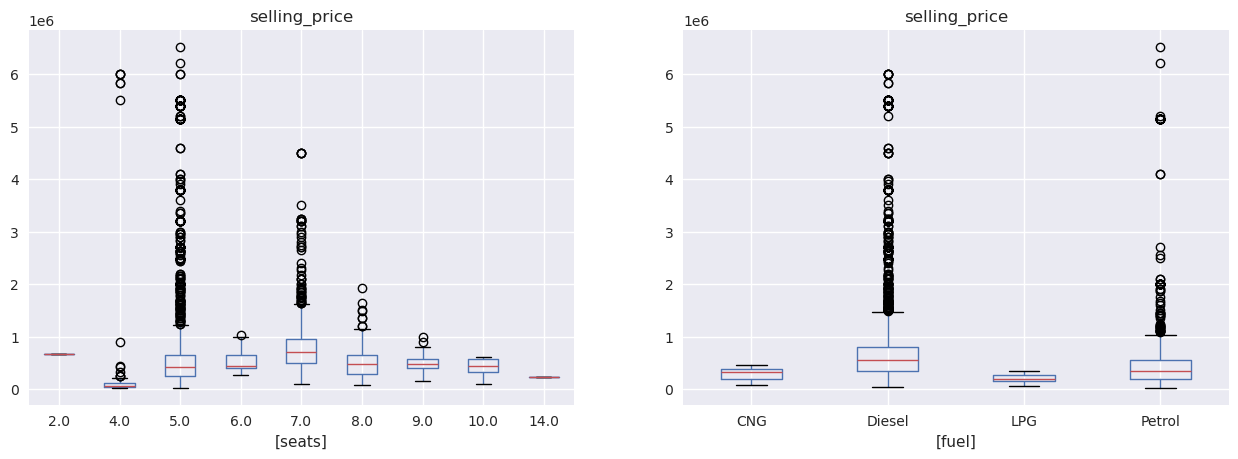

In [9]:
fig = plt.figure(figsize=(15, 5))
gs = mpl.gridspec.GridSpec(1, 2, hspace=0.2)

ax = fig.add_subplot(gs[0, 0])
df = pd.concat([y_train, X_train.seats], axis=1)
df.boxplot(by="seats", ax=ax)

ax = fig.add_subplot(gs[0, 1])
df = pd.concat([y_train, X_train.fuel], axis=1)
df.boxplot(by="fuel", ax=ax)


fig.suptitle('')
plt.show(); plt.close()

## <span style="color:darkblue; font-weight:bold"> C. Variable Encoding </span>

In [10]:
print("***Exclude some variables in train and test:")
Col_list_to_drop = ["fuel", "seller_type", "seats"]
X_train = X_train.drop(Col_list_to_drop, axis=1)
X_test = X_test.drop(Col_list_to_drop, axis=1)


print("\n***Encode owner:")
def Encode_owner(x):
    """
    Note: x is a string
    """
    if x == "First Owner": return 1
    if x == "Second Owner": return 2
    if x == "Third Owner": return 3
    if x == "Fourth & Above Owner": return 4
    if x == "Test Drive Car": return 5
    
X_train["owner"] = [Encode_owner(val) for val in X_train.owner]
X_test["owner"] = [Encode_owner(val) for val in X_test.owner]


print("\n***Standardizing engine and km_driven")
def Scale(s):
    return (s - s.mean()) / s.std()

X_train.engine = Scale(X_train.engine)
X_train.km_driven = Scale(X_train.km_driven)

X_test.engine = Scale(X_test.engine)
X_test.km_driven = Scale(X_test.km_driven)


print("\n***One-hot encode transmission:")
X_train = pd.get_dummies(X_train, columns=["transmission"])
X_test = pd.get_dummies(X_test, columns=["transmission"])


print("\n***One-hot encode brand:")
X_train = pd.get_dummies(X_train, columns=[ "brand"])
X_test = pd.get_dummies(X_test, columns=["brand"])

# When one-hot encoding the 'brand' variable, some brands may appear in the training set but not in the test set, or vice versa. 
# To ensure both sets have the same feature space, we need to include these missing brands in the train and test set.

#Add missing brands for train set
Filter = [(x not in X_test.columns) for x in X_train.columns]
Cols_to_add = X_train.columns[Filter]

for i in Cols_to_add:
    X_test[i] = [False] * len(X_test)

#Add missing brands for test set
Filter = [(x not in X_train.columns) for x in X_test.columns]
Cols_to_add = X_test.columns[Filter]

for i in Cols_to_add:
    X_train[i] = [False] * len(X_train)
        
        
#Align column order in train and test:
X_train = X_train[sorted(X_train.columns)]
X_test = X_test[sorted(X_test.columns)]

***Exclude some variables in train and test:

***Encode owner:

***Standardizing engine and km_driven

***One-hot encode transmission:

***One-hot encode brand:


In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand_Ambassador        4799 non-null   bool   
 1   brand_Ashok             4799 non-null   bool   
 2   brand_Audi              4799 non-null   bool   
 3   brand_BMW               4799 non-null   bool   
 4   brand_Chevrolet         4799 non-null   bool   
 5   brand_Daewoo            4799 non-null   bool   
 6   brand_Datsun            4799 non-null   bool   
 7   brand_Fiat              4799 non-null   bool   
 8   brand_Force             4799 non-null   bool   
 9   brand_Ford              4799 non-null   bool   
 10  brand_Honda             4799 non-null   bool   
 11  brand_Hyundai           4799 non-null   bool   
 12  brand_Isuzu             4799 non-null   bool   
 13  brand_Jaguar            4799 non-null   bool   
 14  brand_Jeep              4799 non-null   

In [12]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand_Ambassador        1200 non-null   bool   
 1   brand_Ashok             1200 non-null   bool   
 2   brand_Audi              1200 non-null   bool   
 3   brand_BMW               1200 non-null   bool   
 4   brand_Chevrolet         1200 non-null   bool   
 5   brand_Daewoo            1200 non-null   bool   
 6   brand_Datsun            1200 non-null   bool   
 7   brand_Fiat              1200 non-null   bool   
 8   brand_Force             1200 non-null   bool   
 9   brand_Ford              1200 non-null   bool   
 10  brand_Honda             1200 non-null   bool   
 11  brand_Hyundai           1200 non-null   bool   
 12  brand_Isuzu             1200 non-null   bool   
 13  brand_Jaguar            1200 non-null   bool   
 14  brand_Jeep              1200 non-null   

## <span style="color:darkblue; font-weight:bold"> D. Parameter Tuning </span>

In [18]:
print("***Parameter Tuning using Bayes search:")
from skopt.space import Real, Integer
param_space = {
    'n_estimators': Integer(100, 2000),     
    'max_depth': Integer(2, 7),                          
    'learning_rate': Real(0.01, 0.1, prior='log-uniform'),
    'colsample_bytree': Real(0.6, 1.0, prior='uniform'),
    'subsample': Real(0.7, 1.0, prior='uniform'),
    'reg_alpha': Real(1e-3, 10, prior='uniform'),
    'reg_lambda': Real(1, 100, prior='uniform'),
    'gamma': Real(1e-3, 10.0, prior='log-uniform'), #Minimum loss reduction required to make a split at a tree node
    'min_child_weight': Integer(1, 10)  #It controls when a tree node is allowed to split
}


cv = KFold(n_splits=10, shuffle=True, random_state=113)

bayes_search = BayesSearchCV(
    estimator=XGBRegressor(random_state=113),
    search_spaces=param_space,
    n_iter=100,  #Number of parameter settings to sample
    cv=cv,
    n_jobs=-1,
    random_state=113,
    scoring='neg_mean_squared_error',
    refit=True) #Refit the best parameters on train set

bayes_search.fit(X_train, y_train);

***Parameter Tuning using Bayes search:


In [23]:
print("***Best parameter combo:\n", bayes_search.best_params_)

print("\nBest combo result:")
print("Mean Negative MSE:", bayes_search.cv_results_['mean_test_score'][bayes_search.best_index_])
print("STD Negative MSE:", bayes_search.cv_results_['std_test_score'][bayes_search.best_index_])

***Best parameter combo:
 OrderedDict({'colsample_bytree': 0.6, 'gamma': 10.0, 'learning_rate': 0.03979297779948229, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 1832, 'reg_alpha': 10.0, 'reg_lambda': 1.0, 'subsample': 0.7})

Best combo result:
Mean Negative MSE: -12420628070.4
STD Negative MSE: 3660873007.462109


## <span style="color:darkblue; font-weight:bold"> E. Performance Evaluating </span>

RMSE = 133149.02665846786
CV of Error(%) = 2102.1998085008195


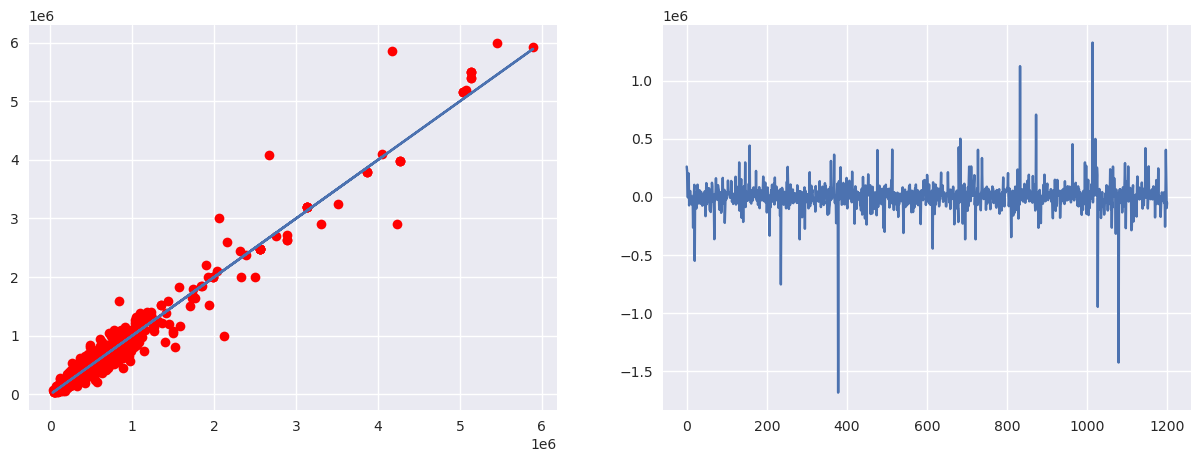

In [ ]:
y_pred = bayes_search.predict(X_test)
RMSE = np.mean((y_pred - y_test)**2)**0.5
print("RMSE =", RMSE)
print("CV of Error(%) =", 100*np.std(y_pred - y_test)/np.mean(y_pred - y_test))


fig, (ax, ax1) = plt.subplots(1,2, figsize=(15,5))
ax.plot(y_pred, y_test, "ro")
ax.plot(y_pred, y_pred)
ax.set_xlabel("Predicted value")
ax.set_ylabel("Observed value")


ax1.plot(range(len(y_pred)), y_pred-y_test)
ax1.set_xlabel("Observation")
ax1.set_ylabel("Error")
plt.show(); plt.close()